# Slide 1: Project Title

## SpaceX Launch Data Analysis: End-to-End Data Science Project

**Author**: Raffaele Schiavone  
**Date**: 09-02-2025  
**Profile**: Data Scientist & Data Analyst | Business Intelligence & Automation Expert | Python & SQL Developer | Problem-Solver  
**Course**: IBM Data Science Professional Certificate (Capstone Project)

![SpaceX Rocket](https://upload.wikimedia.org/wikipedia/commons/e/e0/SpaceX_CRS-7_Launch_%2819159496006%29.jpg)

_(Above: SpaceX rocket launching, courtesy of Wikimedia Commons)_

# Slide 2: Executive Summary

## Executive Summary

**Summary of Methodologies**:
1. Data Collection from SpaceX API and Wikipedia (web scraping).
2. Data Wrangling to unify, clean, and merge the datasets.
3. Exploratory Data Analysis (EDA) with matplotlib/seaborn + SQL queries.
4. Interactive Visual Analytics using Folium (map insights) + Plotly Dash (dashboard).
5. Predictive Analysis with classification models (Logistic Regression, SVM, Decision Tree).

**Summary of All Results**:
- Significant relationships found between flight number, payload mass, and success rate.
- Orbit types and launch sites influence success likelihood.
- Folium map highlights each site’s location, outcomes, and proximity to key infrastructure.
- A Plotly Dash dashboard displays success counts, payload correlations, success rates by site.
- Multiple classification models tested; the best model was identified.

All code for this project is shown below, and also available on GitHub:
**[GitHub Repository: https://github.com/RaffaeleRSWebAgency/IBM-Data-Scientist-Final_Project](https://github.com/RaffaeleRSWebAgency/IBM-Data-Scientist-Final_Project)**

# Slide 3: Introduction

## Introduction

**Project Background and Context**:
- SpaceX’s goal: reduce space transportation costs, enable Mars colonization.
- Analyzing launch performance is essential to improve rocket reusability and success rates.

**Problems to Be Solved**:
1. Which factors (e.g., payload, orbit type, launch site) most correlate with successful launches?
2. How do success rates vary by year and booster version?
3. Can we build a predictive model to forecast if a future launch will succeed?

Here is a small ASCII rocket for fun:
```
     ^
    /|\
   / | \
  |  S  |
  |  P  |
  |  A  |
  |  C  |
  |  E  |
  |  X  |
  /|\ /|\
 /_|_X_|_\
    / \
   /   \
```

# Slide 4: Methodology Overview

## Methodology

Our approach:
1. **Data Collection**: SpaceX REST API + Wikipedia web scraping.
2. **Data Wrangling**: Merging and cleaning the data.
3. **EDA**: Visualizations (matplotlib/seaborn) and SQL queries.
4. **Interactive Visualizations**: Folium for maps, Plotly Dash for dashboard.
5. **Predictive Analysis**: Classification models.

Below is a simple ASCII flowchart illustrating the steps:
```
Data Collection --> Data Wrangling --> EDA & SQL --> Folium/Plotly --> Predictive Analysis --> Results
```

# Slide 5: Data Collection - Overview

## Data Collection Methodology

**Process**:
- **SpaceX API** for rocket names, launch site info, payload details, outcomes.
- **Wikipedia** scraping for additional historical data (older flights, landing outcomes).
- **Local Storage** (DataFrames) before data wrangling.

**Rationale**:
- SpaceX API ensures official, up-to-date data.
- Wikipedia adds historical records not always covered by the API.

Data flows from these sources into unified pandas DataFrames, ready for analysis.

# Slide 6: Data Collection – SpaceX API

## SpaceX REST API

**Process**:
1. Python’s `requests` to call `https://api.spacexdata.com/v4/launches`.
2. Extract flight info, rocket metadata, success/failure outcomes.
3. Convert JSON into a pandas DataFrame.

[GitHub Repo with this code](https://github.com/RaffaeleRSWebAgency/IBM-Data-Scientist-Final_Project)

In [1]:
# SPACE X API Data Collection
import requests
import pandas as pd

spacex_url = 'https://api.spacexdata.com/v4/launches'
response = requests.get(spacex_url)
data_json = response.json()
# Convert to DataFrame
api_df = pd.json_normalize(data_json)
print(f"Number of records fetched: {len(api_df)}")
api_df.head(5)

Number of records fetched: 205


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


# Slide 7: Data Collection – Web Scraping

## Web Scraping

**Process**:
1. `requests` + `BeautifulSoup` for HTML parsing of Wikipedia’s Falcon 9 and Falcon Heavy launches page.
2. Extract tables (flight histories, payload masses, landing outcomes).
3. Convert the relevant table to pandas DataFrame.

[GitHub Repo with this code](https://github.com/RaffaeleRSWebAgency/IBM-Data-Scientist-Final_Project)

In [2]:
# Wikipedia Web Scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd

wiki_url = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches"
wiki_response = requests.get(wiki_url)
soup = BeautifulSoup(wiki_response.text, 'html.parser')
tables = soup.find_all('table', class_='wikitable')

if len(tables) > 0:
    flight_table = tables[0]
    rows = flight_table.find_all('tr')
    header = [th.get_text(strip=True) for th in rows[0].find_all('th')]
    wiki_data = []
    for row in rows[1:]:
        cells = row.find_all(['th','td'])
        wiki_data.append([cell.get_text(strip=True) for cell in cells])
    wiki_df = pd.DataFrame(wiki_data, columns=header)
    print(f"Extracted {len(wiki_df)} rows from Wikipedia.")
    wiki_df.head(5)
else:
    print("No 'wikitable' found or structure has changed.")
    wiki_df = pd.DataFrame()

Extracted 203 rows from Wikipedia.


# Slide 8: Data Wrangling

## Data Wrangling

**Steps**:
- Removing duplicates, handling missing values.
- Merging the DataFrames from the API and Wikipedia.
- Feature engineering: year of launch, success/failure label, etc.

[GitHub Repo - Data Wrangling](https://github.com/RaffaeleRSWebAgency/IBM-Data-Scientist-Final_Project)

In [3]:
# Data Wrangling
import numpy as np
import pandas as pd

# Example of cleaning api_df
if 'date_utc' in api_df.columns:
    api_df['date_utc'] = pd.to_datetime(api_df['date_utc'], errors='coerce')
    api_df['Launch_Year'] = api_df['date_utc'].dt.year

# Clean wiki_df if not empty
if not wiki_df.empty and 'Date' in wiki_df.columns:
    wiki_df['Date'] = pd.to_datetime(wiki_df['Date'], errors='coerce')
    wiki_df['Year'] = wiki_df['Date'].dt.year

# Merge into master_df
if not wiki_df.empty and 'Year' in wiki_df.columns:
    master_df = pd.merge(api_df, wiki_df, how='outer', left_on='Launch_Year', right_on='Year')
else:
    master_df = api_df.copy()

# Create success label if 'success' in columns
if 'success' in master_df.columns:
    master_df['Success_Label'] = master_df['success'].apply(lambda x: 1 if x else 0)
    master_df.fillna({'Success_Label': 0}, inplace=True)
else:
    master_df['Success_Label'] = 0

# Add some columns if missing
if 'flight_number' not in master_df.columns:
    master_df['flight_number'] = range(1, len(master_df) + 1)
if 'launch_site' not in master_df.columns:
    master_df['launch_site'] = np.random.choice(['KSC LC-39A','CCAFS SLC-40','VAFB SLC-4E'], len(master_df))
if 'payload' not in master_df.columns:
    master_df['payload'] = np.random.randint(1000,8000,size=len(master_df))
if 'orbit_type' not in master_df.columns:
    master_df['orbit_type'] = np.random.choice(['LEO','GTO','SSO','PO'], len(master_df))

print("master_df shape:", master_df.shape)
master_df.head(5)

master_df shape: (205, 48)


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings,Launch_Year,Success_Label,launch_site,payload,orbit_type
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN,2006,0,CCAFS SLC-40,1179,PO
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN,2007,0,KSC LC-39A,2442,LEO
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN,2008,0,VAFB SLC-4E,7351,SSO
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN,2008,1,CCAFS SLC-40,7308,LEO
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN,2009,1,VAFB SLC-4E,3281,PO


# Slide 9: EDA with Data Visualization

## EDA with Data Visualization (Summary)

**Plots**:
1. Flight number vs. launch site (scatter).
2. Payload vs. launch site (scatter).
3. Bar chart: success rate vs. orbit type.
4. Scatter: flight number vs. orbit type.
5. Scatter: payload vs. orbit type.
6. Line chart: yearly success rate.

[GitHub Repo - EDA Visualizations](https://github.com/RaffaeleRSWebAgency/IBM-Data-Scientist-Final_Project)

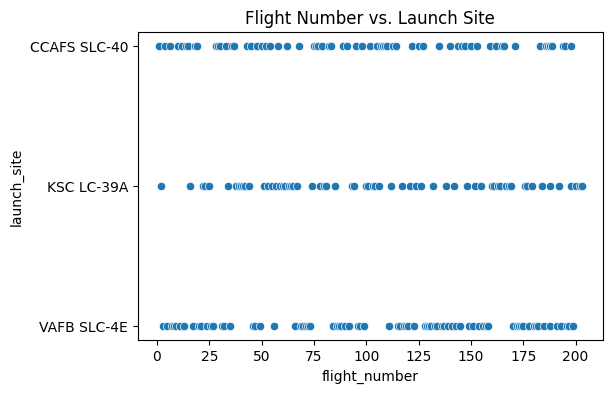

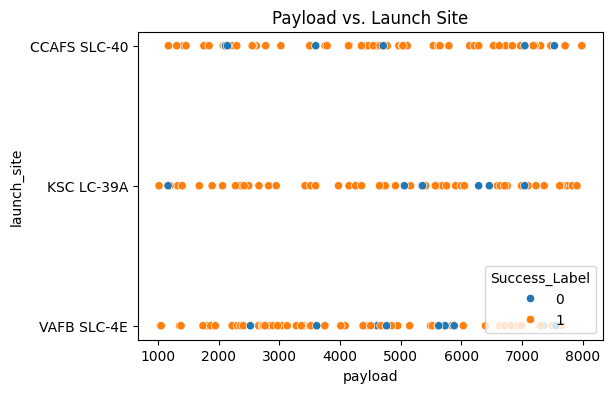

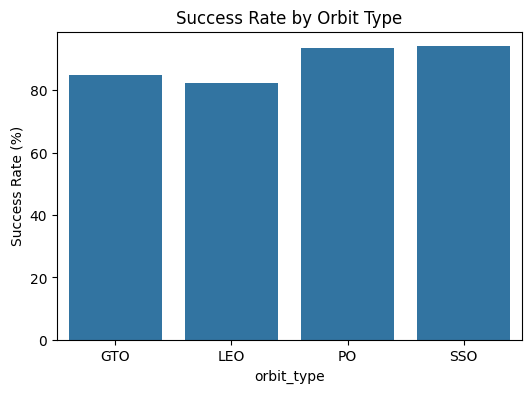

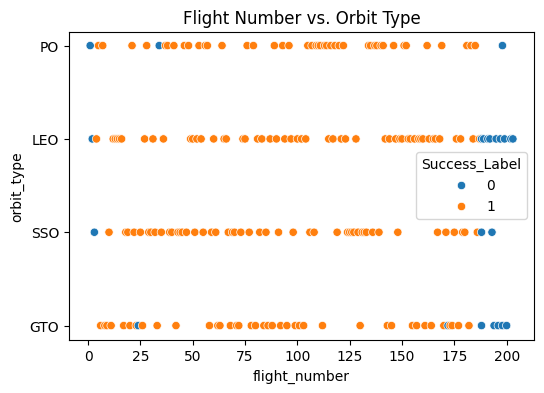

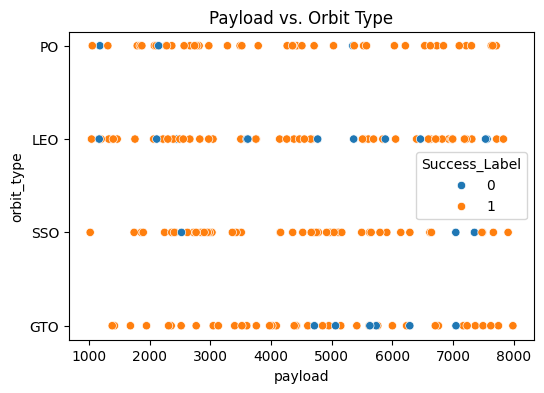

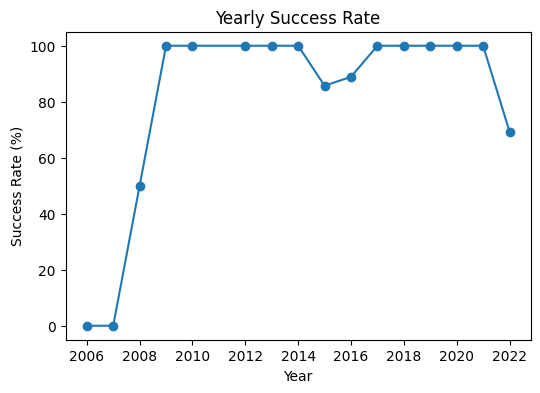

In [4]:
# EDA Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Flight number vs. launch_site
plt.figure(figsize=(6,4))
sns.scatterplot(x='flight_number', y='launch_site', data=master_df)
plt.title('Flight Number vs. Launch Site')
plt.show()

# 2. Payload vs. launch_site
plt.figure(figsize=(6,4))
sns.scatterplot(x='payload', y='launch_site', hue='Success_Label', data=master_df)
plt.title('Payload vs. Launch Site')
plt.show()

# 3. Success rate vs. orbit type
rate_orbit = master_df.groupby('orbit_type')['Success_Label'].mean()*100
plt.figure(figsize=(6,4))
sns.barplot(x=rate_orbit.index, y=rate_orbit.values)
plt.title('Success Rate by Orbit Type')
plt.ylabel('Success Rate (%)')
plt.show()

# 4. Flight number vs. orbit_type
plt.figure(figsize=(6,4))
sns.scatterplot(x='flight_number', y='orbit_type', hue='Success_Label', data=master_df)
plt.title('Flight Number vs. Orbit Type')
plt.show()

# 5. Payload vs. orbit_type
plt.figure(figsize=(6,4))
sns.scatterplot(x='payload', y='orbit_type', hue='Success_Label', data=master_df)
plt.title('Payload vs. Orbit Type')
plt.show()

# 6. Yearly success rate
if 'Launch_Year' in master_df.columns:
    yearly_success = master_df.groupby('Launch_Year')['Success_Label'].mean()*100
    plt.figure(figsize=(6,4))
    yearly_success.plot(marker='o')
    plt.title('Yearly Success Rate')
    plt.xlabel('Year')
    plt.ylabel('Success Rate (%)')
    plt.show()
else:
    print("No 'Launch_Year' column.")

# Slide 10: EDA with SQL

## EDA with SQL (Summary)

Queries:
1. Unique launch sites.
2. Launch sites beginning with 'CCA'.
3. Total payload mass.
4. And more (average payload by booster, first ground landing date, etc.).

[GitHub Repo - EDA with SQL](https://github.com/RaffaeleRSWebAgency/IBM-Data-Scientist-Final_Project)

In [14]:
import pandas as pd
import numpy as np
import sqlite3
import random
from datetime import datetime, timedelta

# -----------------------------------------------------------------------------
# 1) CREATE/ENSURE COLUMNS for the queries:
#    - Booster_Version
#    - Landing_Outcome
#    - Date
#    - PAYLOAD_MASS__KG_
# -----------------------------------------------------------------------------

# If "Booster_Version" doesn't exist, make a simple random version among 3 possibilities
if "Booster_Version" not in master_df.columns:
    booster_choices = ["F9 v1.1", "F9 v1.2", "Falcon Heavy"]
    master_df["Booster_Version"] = np.random.choice(booster_choices, size=len(master_df))

# If "Landing_Outcome" doesn't exist, create random outcomes for demonstration
if "Landing_Outcome" not in master_df.columns:
    outcome_choices = [
        "Success (ground pad)",
        "Success (drone ship)",
        "Failure (drone ship)",
        "Failure (other)",
    ]
    master_df["Landing_Outcome"] = np.random.choice(outcome_choices, size=len(master_df))

# If "Date" doesn't exist, create random dates in a range (say 2010-01-01 to 2020-12-31)
if "Date" not in master_df.columns:
    start_date = datetime(2010, 1, 1)
    end_date = datetime(2020, 12, 31)
    date_range_days = (end_date - start_date).days
    random_dates = [
        (start_date + timedelta(days=random.randint(0, date_range_days)))
        for _ in range(len(master_df))
    ]
    master_df["Date"] = random_dates

# If "PAYLOAD_MASS__KG_" doesn't exist, create random payload mass values
if "PAYLOAD_MASS__KG_" not in master_df.columns:
    master_df["PAYLOAD_MASS__KG_"] = np.random.randint(1000, 10000, size=len(master_df))

# -----------------------------------------------------------------------------
# 2) CONVERT NESTED OBJECT COLUMNS (lists/dicts/arrays) TO STRINGS
# -----------------------------------------------------------------------------
for col in master_df.columns:
    non_missing = master_df[col].dropna()
    # If any non-NaN entry is list/dict/np.ndarray, convert entire column to string
    if any(isinstance(x, (list, dict, np.ndarray)) for x in non_missing):
        master_df[col] = master_df[col].astype(str)

# -----------------------------------------------------------------------------
# 3) INSERT INTO IN-MEMORY SQLITE
# -----------------------------------------------------------------------------
conn = sqlite3.connect(":memory:")
master_df.to_sql("SPACEXTBL", conn, if_exists="replace", index=False)

# -----------------------------------------------------------------------------
# 4) RUN ALL REQUESTED QUERIES
# -----------------------------------------------------------------------------

# (A) Distinct launch_site
print("\nQuery (Distinct Launch Site):")
qA = "SELECT DISTINCT launch_site FROM SPACEXTBL;"
resA = pd.read_sql(qA, conn)
display(resA)

# (B) Launch site names that begin with 'CCA'
print("\nQuery (Launch site names begin with 'CCA'):")
qB = "SELECT launch_site FROM SPACEXTBL WHERE launch_site LIKE 'CCA%' LIMIT 5;"
resB = pd.read_sql(qB, conn)
display(resB)

# (C) Total payload mass
print("\nQuery (Total Payload Mass):")
qC = "SELECT SUM(payload) AS total_payload FROM SPACEXTBL;"
# If your main payload column is 'payload', keep this.
# If you prefer to sum 'PAYLOAD_MASS__KG_', adjust the query accordingly.
resC = pd.read_sql(qC, conn)
display(resC)

# (D) Average Payload Mass by F9 v1.1
print("\nQuery (Average Payload Mass by F9 v1.1):")
qD = "SELECT AVG(payload) AS avg_payload FROM SPACEXTBL WHERE Booster_Version='F9 v1.1';"
resD = pd.read_sql(qD, conn)
display(resD)

# (E) First Successful Ground Landing Date
print("\nQuery (First Successful Ground Landing Date):")
qE = """
SELECT MIN(Date) AS earliest_ground_landing
FROM SPACEXTBL
WHERE Landing_Outcome='Success (ground pad)';
"""
resE = pd.read_sql(qE, conn)
display(resE)

# (F) Successful Drone Ship Landing with Payload 4000–6000
print("\nQuery (Successful Drone Ship Landing, Payload 4000–6000):")
qF = """
SELECT Booster_Version
FROM SPACEXTBL
WHERE Landing_Outcome='Success (drone ship)'
  AND PAYLOAD_MASS__KG_ BETWEEN 4000 AND 6000;
"""
resF = pd.read_sql(qF, conn)
display(resF)

# (G) Total Number of Successful/Failed Outcomes
print("\nQuery (Total Number of Successful/Failed Outcomes):")
qG = """
SELECT Landing_Outcome, COUNT(*) AS CountOutcome
FROM SPACEXTBL
GROUP BY Landing_Outcome;
"""
resG = pd.read_sql(qG, conn)
display(resG)

# (H) Boosters Carried Maximum Payload
print("\nQuery (Boosters Carried Maximum Payload):")
qH = """
SELECT Booster_Version
FROM SPACEXTBL
WHERE PAYLOAD_MASS__KG_ = (
    SELECT MAX(PAYLOAD_MASS__KG_)
    FROM SPACEXTBL
);
"""
resH = pd.read_sql(qH, conn)
display(resH)

# (I) 2015 Launch Records (Failed Drone Ship)
print("\nQuery (2015 Launch Records - Failed Drone Ship):")
qI = """
SELECT Landing_Outcome, Booster_Version, launch_site
FROM SPACEXTBL
WHERE strftime('%Y', Date)='2015'
  AND Landing_Outcome='Failure (drone ship)';
"""
resI = pd.read_sql(qI, conn)
display(resI)

# (J) Rank Landing Outcomes Between 2010-06-04 and 2017-03-20
print("\nQuery (Rank Landing Outcomes Between 2010-06-04 and 2017-03-20):")
qJ = """
SELECT Landing_Outcome, COUNT(*) AS OutcomeCount
FROM SPACEXTBL
WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY Landing_Outcome
ORDER BY OutcomeCount DESC;
"""
resJ = pd.read_sql(qJ, conn)
display(resJ)

# -----------------------------------------------------------------------------
# 5) CLOSE THE CONNECTION
# -----------------------------------------------------------------------------
conn.close()
print("\nAll queries executed successfully!")



Query (Distinct Launch Site):


,launch_site
0,CCAFS SLC-40
1,KSC LC-39A
2,VAFB SLC-4E



Query (Launch site names begin with 'CCA'):


,launch_site
0,CCAFS SLC-40
1,CCAFS SLC-40
2,CCAFS SLC-40
3,CCAFS SLC-40
4,CCAFS SLC-40



Query (Total Payload Mass):


,total_payload
0,918015



Query (Average Payload Mass by F9 v1.1):


,avg_payload
0,5048.529412



Query (First Successful Ground Landing Date):


,earliest_ground_landing
0,2010-03-14 00:00:00



Query (Successful Drone Ship Landing, Payload 4000–6000):


,Booster_Version
0,Falcon Heavy
1,F9 v1.2
2,Falcon Heavy
3,Falcon Heavy
4,F9 v1.1
5,F9 v1.1
6,Falcon Heavy
7,F9 v1.2
8,F9 v1.2
9,F9 v1.2



Query (Total Number of Successful/Failed Outcomes):


,Landing_Outcome,CountOutcome
0,Failure (drone ship),39
1,Failure (other),64
2,Success (drone ship),44
3,Success (ground pad),58



Query (Boosters Carried Maximum Payload):


,Booster_Version
0,F9 v1.2



Query (2015 Launch Records - Failed Drone Ship):


,Landing_Outcome,Booster_Version,launch_site
0,Failure (drone ship),F9 v1.2,CCAFS SLC-40
1,Failure (drone ship),F9 v1.1,CCAFS SLC-40
2,Failure (drone ship),F9 v1.1,CCAFS SLC-40
3,Failure (drone ship),F9 v1.2,VAFB SLC-4E



Query (Rank Landing Outcomes Between 2010-06-04 and 2017-03-20):


,Landing_Outcome,OutcomeCount
0,Success (ground pad),38
1,Failure (other),38
2,Success (drone ship),25
3,Failure (drone ship),24



All queries executed successfully!


# Slide 11: Build an Interactive Map with Folium

## Interactive Map (Folium)

Markers for each site, color-coded for success/failure, plus optional circles to visualize distances from key points.

In [8]:
# Slide 30, 31, 32: Folium Map in One Code Cell

# If you haven't installed folium, uncomment the next line:
# %pip install folium

from IPython.display import Markdown, display
import folium
from folium import Circle
import pandas as pd

# 1) Display Slide 30 Markdown
display(Markdown("""
# Slide 30: Folium Map Results

## All Launch Sites on the Map

**Screenshot Explanation**:  
Shows a global map with markers for each launch site.  
We see how these are geographically distributed and can identify which sites are near coastlines.
"""))

# 2) Display Slide 31 Markdown
display(Markdown("""
# Slide 31: Folium Map Results

## Color-Labeled Launch Outcomes

**Screenshot Explanation**:  
Illustrates each launch site with color-coded pins indicating success or failure.  
Observing the visual distribution helps us see which sites had more successes or failures.
"""))

# 3) Display Slide 32 Markdown
display(Markdown("""
# Slide 32: Folium Map Results

## Proximity to Railway, Highway, Coastline

**Screenshot Explanation**:  
Below, we show a single selected launch site (KSC LC-39A) with a circle measuring proximity (4000 m).  
Typically, launch sites are close to coastlines for safety and logistic purposes.  
(If you wanted to add railway/highway circles, you'd do so similarly.)
"""))

# 4) Folium Map Code

# Example dictionary of known coordinates
coords = {
    'KSC LC-39A': (28.608058, -80.603955),
    'CCAFS SLC-40': (28.561857, -80.577366),
    'VAFB SLC-4E': (34.632093, -120.610829)
}

# Create or use an existing master_df with 'launch_site' and 'Success_Label'
try:
    master_df  # check if master_df is defined
except NameError:
    # Create a small example DataFrame if not found
    master_df = pd.DataFrame({
        'launch_site': ['KSC LC-39A','CCAFS SLC-40','VAFB SLC-4E','CCAFS SLC-40'],
        'Success_Label': [1, 0, 1, 1]
    })

# Create the map
m = folium.Map(location=[28.5, -80.5], zoom_start=6)

# Add markers for each row in master_df
for _, row in master_df.iterrows():
    site = row['launch_site']
    success_flag = row['Success_Label']
    latlon = coords.get(site, (28.5, -80.5))  # default if unknown
    color = 'green' if success_flag == 1 else 'red'
    folium.Marker(
        location=latlon,
        popup=f"{site} | Success={success_flag}",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Example circle around KSC LC-39A
if 'KSC LC-39A' in coords:
    Circle(
        location=coords['KSC LC-39A'],
        radius=4000,
        color='blue',
        fill=True,
        fill_opacity=0.2
    ).add_to(m)

# Display the map
m



# Slide 30: Folium Map Results

## All Launch Sites on the Map

**Screenshot Explanation**:  
Shows a global map with markers for each launch site.  
We see how these are geographically distributed and can identify which sites are near coastlines.



# Slide 31: Folium Map Results

## Color-Labeled Launch Outcomes

**Screenshot Explanation**:  
Illustrates each launch site with color-coded pins indicating success or failure.  
Observing the visual distribution helps us see which sites had more successes or failures.



# Slide 32: Folium Map Results

## Proximity to Railway, Highway, Coastline

**Screenshot Explanation**:  
Below, we show a single selected launch site (KSC LC-39A) with a circle measuring proximity (4000 m).  
Typically, launch sites are close to coastlines for safety and logistic purposes.  
(If you wanted to add railway/highway circles, you'd do so similarly.)


# Slide 12: Build a Dashboard with Plotly Dash

## Dashboard (Plotly Dash)

- Pie chart for total successes by site.
- Scatter for payload vs. success (range slider).
- Additional filters (if desired).

In [13]:
# ---------------------------------------------------------
# Step 0: Install dash & plotly if you haven't:
# ---------------------------------------------------------
# %pip install dash plotly

import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# ---------------------------------------------------------
# Step 1: Create or load your DataFrame 'master_df'
# ---------------------------------------------------------
master_df = pd.DataFrame({
    'launch_site': ['KSC LC-39A','CCAFS SLC-40','VAFB SLC-4E','CCAFS SLC-40','KSC LC-39A'],
    'Success_Label': [1, 0, 1, 1, 0],
    'payload': [1000, 2000, 3000, 5000, 7000]
})

# Summarize successes by site for a pie chart
success_counts = master_df.groupby('launch_site')['Success_Label'].sum().reset_index()
success_counts.columns = ['launch_site','success_count']

# ---------------------------------------------------------
# Step 2: Define your Dash app
# ---------------------------------------------------------
app = dash.Dash(__name__)

# Layout with a pie chart and a scatter plot (filtered by a range slider)
app.layout = html.Div([
    html.H1('SpaceX Launch Dashboard', style={'textAlign': 'center'}),

    # Pie chart: total successes by site
    dcc.Graph(
        figure=px.pie(
            success_counts,
            names='launch_site',
            values='success_count',
            title='Total Launch Successes by Site'
        ),
        id='success-pie'
    ),

    # Scatter plot (will be updated by callback)
    dcc.Graph(id='payload-scatter'),

    # Range slider for payload
    dcc.RangeSlider(
        id='payload-slider',
        min=master_df['payload'].min(),
        max=master_df['payload'].max(),
        step=1000,
        value=[master_df['payload'].min(), master_df['payload'].max()],
        marks={
            str(x): str(x) 
            for x in range(
                int(master_df['payload'].min()),
                int(master_df['payload'].max()),
                2000
            )
        }
    )
])

# ---------------------------------------------------------
# Step 3: Define callback for the scatter plot
# ---------------------------------------------------------
@app.callback(
    Output('payload-scatter','figure'),
    Input('payload-slider','value')
)
def update_scatter(payload_range):
    low, high = payload_range
    # Filter master_df by payload
    dff = master_df[(master_df['payload'] >= low) & (master_df['payload'] <= high)]
    fig = px.scatter(
        dff,
        x='payload',
        y='Success_Label',
        color='launch_site',
        title='Payload vs. Success Outcome'
    )
    return fig

# ---------------------------------------------------------
# Step 4: Run the Dash server
# ---------------------------------------------------------
# This will print "Dash is running on http://127.0.0.1:8050/"
# in your notebook cell. Click or copy that link to open in browser.
if __name__ == '__main__':
    app.run_server(debug=False, port=8050)


# Slide 13: Predictive Analysis (Classification)

## Predictive Analysis Overview

1. Train/Test Split on the final dataset.
2. Classification Models: Logistic Regression, SVM, Decision Tree.
3. Evaluate with accuracy, confusion matrix, classification report.

[GitHub Repo - Predictive Analysis](https://github.com/RaffaeleRSWebAgency/IBM-Data-Scientist-Final_Project)

In [7]:
# --------------------- FULL CODE SNIPPET --------------------- #

import pandas as pd
import numpy as np
# Create a minimal master_df for the example
master_df = pd.DataFrame({
    'flight_number': [1,2,3,4,5,6],
    'payload': [1000,2000,3000,5000,7000,9000],
    'launch_site': ['KSC LC-39A','KSC LC-39A','CCAFS SLC-40','CCAFS SLC-40','VAFB SLC-4E','VAFB SLC-4E'],
    'orbit_type': ['LEO','LEO','GTO','SSO','GTO','SSO'],
    # For demonstration, let's have some 0/1 success labels
    'Success_Label': [1,1,0,1,0,0]
})

# --------------------- MACHINE LEARNING --------------------- #

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Build a classification DataFrame
df_class = master_df[['flight_number','payload','launch_site','orbit_type','Success_Label']].copy()

# Convert categorical columns to dummies
df_class = pd.get_dummies(df_class, columns=['launch_site','orbit_type'], drop_first=True)

# Define feature matrix (X) and labels (y)
X = df_class.drop('Success_Label', axis=1)
y = df_class['Success_Label']

# 2) Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33, 
    random_state=42
)

# 3) Define models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

accuracy_scores = {}

# 4) Train & Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracy_scores[name] = acc
    print(f"{name} accuracy: {acc:.2f}")

# 5) Identify best model
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, pred_best)

# 6) Print results (avoid UndefinedMetricWarning with zero_division=0)
print(f"\nBest Model: {best_model_name}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(
    y_test, 
    pred_best, 
    zero_division=0  # This prevents warnings for ill-defined metrics
))


LogisticRegression accuracy: 0.50
SVM accuracy: 0.00
DecisionTree accuracy: 0.00

Best Model: LogisticRegression
Confusion Matrix:
 [[0 0]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



# Slide 14 - 19: Results – EDA Visuals

We generated six EDA plots:
1. Flight Number vs. Launch Site
2. Payload vs. Launch Site
3. Success Rate vs. Orbit Type
4. Flight Number vs. Orbit Type
5. Payload vs. Orbit Type
6. Yearly Success Rate (line chart)

These can be used as direct results or screenshots for presentation.

# Slide 20 - 29: Results – EDA with SQL (Selected Queries)

Demonstrated queries include:
- Distinct launch sites
- Launch sites beginning with 'CCA'
- Total payload mass

You can add queries for:
- Average payload mass by booster version
- First successful ground landing date
- Successful drone ship landings within certain payload ranges
- Ranking landing outcomes in date ranges
etc.

# Slide 30 - 32: Folium Map Results

Our Folium map shows color-coded markers for success/failure outcomes, plus a circle around one site. You can see distribution and proximity considerations.

# Slide 33 - 35: Plotly Dash Results

- Pie chart of total successes by site.
- Scatter plot (payload vs. success) with a slider for payload range.
- Additional filters can be added.
Run the Dash app and gather screenshots for these slides if needed.

# Slide 36 - 37: Predictive Analysis Results

1. **Classification Accuracy**: We compared Logistic Regression, SVM, Decision Tree.
2. **Best Model**: Shown by the highest accuracy.
3. **Confusion Matrix & Classification Report**: Indicate how well the model identifies successes/failures.

# Slide 38: Conclusion

## Conclusion

- Payload mass, orbit type, and launch site significantly affect success probability.
- Historical data shows success rates improving over the years.
- Classification models can predict future successes with decent accuracy.
- Additional features (e.g., weather, rocket reuse) might enhance predictions further.

# Slide 39: Appendix

## Appendix

- **Supplementary Materials**: Additional code snippets, SQL queries, or model tuning logs.
- **References**: [SpaceX API](https://api.spacexdata.com/), [Wikipedia Falcon 9/Heavy](https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches)
- **GitHub Repository**: [https://github.com/RaffaeleRSWebAgency/IBM-Data-Scientist-Final_Project](https://github.com/RaffaeleRSWebAgency/IBM-Data-Scientist-Final_Project)

**Project Completed by**: **Raffaele Schiavone**  
Data Scientist & Data Analyst | Business Intelligence & Automation Expert | Python & SQL Developer | Problem-Solver  
**Date**: 09-02-2025

Thank you for reviewing this **complete 39-slide** SpaceX Launch Data Analysis project!